In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("mymoviedb.csv",lineterminator='\n')
df.head(3)

Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en                            Thriller   

                                          Poster_Url  
0  https://image.tmdb.org/t/p/original/1g0dhYtq4i...  
1  https://image.tmdb.org/t/p/original/74xTEgt7R3...  
2  https://image.tmdb.org/t/p/original/vDHsLnOWKl...

In [3]:
#viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


• looks like our dataset has no NaNs! 
• Overview, Original_Language and Poster-Url wouldn't be so useful during analysis
• Release_Date column needs to be casted into date time and to extract only the year value

In [4]:
# check for Missing Data 
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [5]:
# exploring genres column
df['Genre'].head(5)

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
# check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [7]:
# exploring summary statistics 
df.describe()

Popularity    Vote_Count  Vote_Average
count  9827.000000   9827.000000   9827.000000
mean     40.326088   1392.805536      6.439534
std     108.873998   2611.206907      1.129759
min      13.354000      0.000000      0.000000
25%      16.128500    146.000000      5.900000
50%      21.199000    444.000000      6.500000
75%      35.191500   1376.000000      7.100000
max    5083.954000  31077.000000     10.000000

# Data Cleaning
Casting Release_Date column and extracing year values

In [8]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# confirming changes
print(df['Release_Date'].dtypes)


datetime64[ns]


In [9]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [10]:
df.head(4)

Release_Date                    Title  \
0          2021  Spider-Man: No Way Home   
1          2022               The Batman   
2          2022                  No Exit   
3          2021                  Encanto   

                                            Overview  Popularity  Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954        8940   
1  In his second year of fighting crime, Batman u...    3827.658        1151   
2  Stranded at a rest stop in the mountains durin...    2618.087         122   
3  The tale of an extraordinary family, the Madri...    2402.201        5076   

   Vote_Average Original_Language                               Genre  \
0           8.3                en  Action, Adventure, Science Fiction   
1           8.1                en            Crime, Mystery, Thriller   
2           6.3                en                            Thriller   
3           7.7                en  Animation, Comedy, Family, Fantasy   

                                          Poster_Url  
0  https://image.tmdb.org/t/p/original/1g0dhYtq4i...  
1  https://image.tmdb.org/t/p/original/74xTEgt7R3...  
2  https://image.tmdb.org/t/p/original/vDHsLnOWKl...  
3  https://image.tmdb.org/t/p/original/4j0PNHkMr5...

DROPPING THE COLUMNS

In [11]:
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis=1, inplace=True, errors='ignore')


In [12]:
df.head()

Release_Date                    Title  Popularity  Vote_Count  \
0          2021  Spider-Man: No Way Home    5083.954        8940   
1          2022               The Batman    3827.658        1151   
2          2022                  No Exit    2618.087         122   
3          2021                  Encanto    2402.201        5076   
4          2021           The King's Man    1895.511        1793   

   Vote_Average                               Genre  
0           8.3  Action, Adventure, Science Fiction  
1           8.1            Crime, Mystery, Thriller  
2           6.3                            Thriller  
3           7.7  Animation, Comedy, Family, Fantasy  
4           7.0    Action, Adventure, Thriller, War

***categorizing Vote_Average column***
We would cut the Vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using catigorize_col() function
provided above.


In [13]:
def categorize_col(df, col, labels):
    """
    Categorizes a numerical column based on its quartiles.

    Args:
        df (DataFrame): The DataFrame to process.
        col (str): The column name to categorize.
        labels (list): List of labels from min to max.

    Returns:
        DataFrame: The updated DataFrame with the categorized column.
    """
    # Set the edges using the column's descriptive stats
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

                

In [14]:
# define labels for edges
labels = ['not_popular','below_avg','average','popular']

# categorize column based on labels and edges
categorize_col(df,'Vote_Average',labels)

Release_Date                                 Title  Popularity  \
0             2021               Spider-Man: No Way Home    5083.954   
1             2022                            The Batman    3827.658   
2             2022                               No Exit    2618.087   
3             2021                               Encanto    2402.201   
4             2021                        The King's Man    1895.511   
...            ...                                   ...         ...   
9822          1973                              Badlands      13.357   
9823          2020                      Violent Delights      13.356   
9824          2016                          The Offering      13.355   
9825          2021  The United States vs. Billie Holiday      13.354   
9826          1984                               Threads      13.354   

      Vote_Count Vote_Average                               Genre  
0           8940      popular  Action, Adventure, Science Fiction  
1           1151      popular            Crime, Mystery, Thriller  
2            122    below_avg                            Thriller  
3           5076      popular  Animation, Comedy, Family, Fantasy  
4           1793      average    Action, Adventure, Thriller, War  
...          ...          ...                                 ...  
9822         896      popular                        Drama, Crime  
9823           8  not_popular                              Horror  
9824          94  not_popular           Mystery, Thriller, Horror  
9825         152      average               Music, Drama, History  
9826         186      popular         War, Drama, Science Fiction  

[9827 rows x 6 columns]

In [15]:
#confirming changes
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [16]:
df.head(5)

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below_avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War

In [17]:
 # exploring column 
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [18]:
# dropping NaNs 
df.dropna(inplace=True)

#confirming
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [19]:
df.head()

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2022               The Batman    3827.658        1151      popular   
2          2022                  No Exit    2618.087         122    below_avg   
3          2021                  Encanto    2402.201        5076      popular   
4          2021           The King's Man    1895.511        1793      average   

                                Genre  
0  Action, Adventure, Science Fiction  
1            Crime, Mystery, Thriller  
2                            Thriller  
3  Animation, Comedy, Family, Fantasy  
4    Action, Adventure, Thriller, War

# Split Genres and Normalize Movie Rows

In [20]:
# split the strings into lists 
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head(5)

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   
3          2022               The Batman    3827.658        1151      popular   
4          2022               The Batman    3827.658        1151      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
3            Crime  
4          Mystery

In [21]:
#Casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [23]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Now that our dataset is clean and tidy, we are left with a total of 6 columns and 25552 rows to dig into during our analysis

# Data Visualization

here, we'd use Matplotlib and seaborn for making some informative visuals to gain insights abut our data.

In [24]:
# setting up seaborn configurations 
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?


In [25]:
# showing stats. on genre column 
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

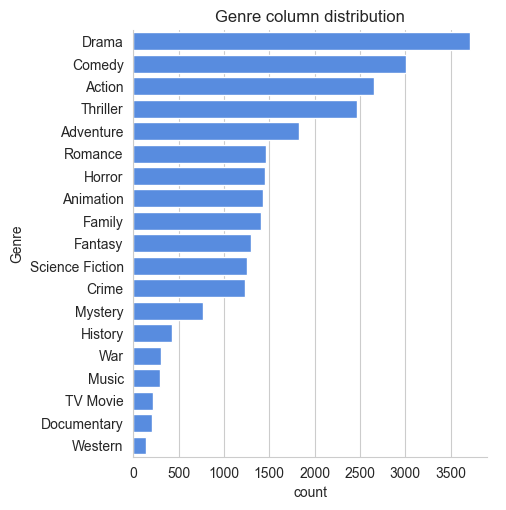

In [26]:
# visualizing genre column
sns.catplot(y = 'Genre',data =  df,kind = 'count',
           order = df['Genre'].value_counts().index,
           color = '#4287f5')
plt.title('Genre column distribution')
plt.show()

we can notice from the above visual that Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.


# Which has highest votes in vote avg column?


In [27]:
df.head()

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   
3          2022               The Batman    3827.658        1151      popular   
4          2022               The Batman    3827.658        1151      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
3            Crime  
4          Mystery

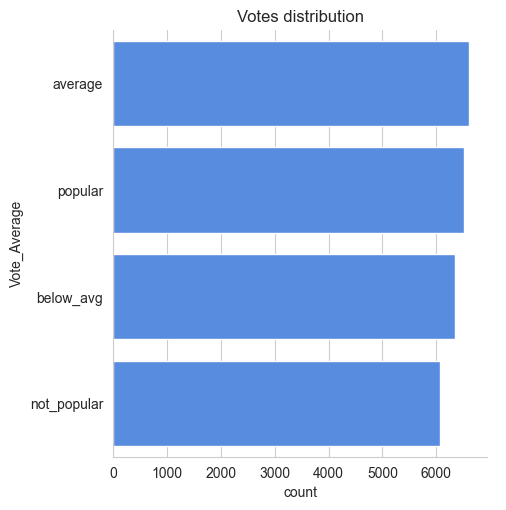

In [28]:
# visualizing vote_average column
sns.catplot(y = 'Vote_Average',data =  df,kind = 'count',
           order = df['Vote_Average'].value_counts().index,
           color = '#4287f5')
plt.title('Votes distribution')
plt.show()

# What movie got the highest popularity? what's its genre?


In [29]:
df.head(5)

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   
3          2022               The Batman    3827.658        1151      popular   
4          2022               The Batman    3827.658        1151      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction  
3            Crime  
4          Mystery

In [30]:
# checking max popularity in dataset 
df[df['Popularity'] == df['Popularity'].max()] 

Release_Date                    Title  Popularity  Vote_Count Vote_Average  \
0          2021  Spider-Man: No Way Home    5083.954        8940      popular   
1          2021  Spider-Man: No Way Home    5083.954        8940      popular   
2          2021  Spider-Man: No Way Home    5083.954        8940      popular   

             Genre  
0           Action  
1        Adventure  
2  Science Fiction

# What movie got the lowest popularity? what's its genre?


In [31]:
# checking max popularity in dataset 
df[df['Popularity'] == df['Popularity'].min()] 

Release_Date                                 Title  Popularity  \
25546          2021  The United States vs. Billie Holiday      13.354   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          2021  The United States vs. Billie Holiday      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   
25551          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
25546         152      average            Music  
25547         152      average            Drama  
25548         152      average          History  
25549         186      popular              War  
25550         186      popular            Drama  
25551         186      popular  Science Fiction

# Which year has the most filmmed movies?


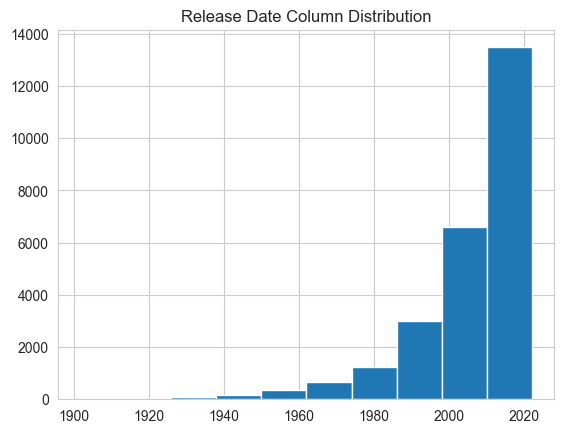

In [32]:
df['Release_Date'].hist()
plt.title('Release Date Column Distribution')
plt.show()